In [1]:
import math
import pandas as pd
import tensorflow as tf
# import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
np.random.seed(0)
# from sklearn.datasets import fetch_california_housing

# https://www.analyticsvidhya.com/blog/2021/06/dimensionality-reduction-using-autoencoders-in-python/#:~:text=AutoEncoder%20is%20an%20unsupervised%20Artificial,representation%20of%20the%20input%20data.


# Sequencing data

In [2]:
# hundred = pd.read_csv('hundred_patients.csv')
hundred = pd.read_csv('data/cd_df.csv')
hundred = hundred.set_index("Gene_Symbol")
hundred

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.881250,-8.385900,-3.476500,0.47600,-6.860900,-3.757300,-4.744800,-0.044202,-2.506500,0.006241,...,-1.031600,1.16230,0.199200,0.23903,1.361500,-0.934720,-0.248440,-5.228900,-0.680680,-1.489900
APOA1,-3.046500,-9.361700,-2.636300,0.93493,-6.478400,-5.871500,-9.417700,-0.653090,-4.268600,-0.835050,...,-0.569040,0.74486,0.200140,-0.15932,1.051600,-1.207500,-1.068500,-7.455900,0.396090,-2.945300
APOA4,-0.918130,-7.169600,-2.648600,0.19887,-7.481800,-3.041400,-7.560500,-0.947140,-1.662300,-0.893450,...,-0.829470,0.54624,0.532340,-0.29898,0.265380,-0.071699,-1.206200,-6.297200,0.225200,-1.919800
APOB,-1.312800,-7.415800,-2.541200,1.91080,-7.065600,-3.729600,-6.837700,0.335400,-3.110900,-0.016976,...,-0.000025,1.02530,0.417150,0.14618,1.016900,0.075990,-0.442670,-5.480500,-0.043606,-2.899300
APOC3,-1.277500,-8.088000,-2.169100,0.80647,-7.229600,-3.867300,-8.254200,-0.466340,-1.608800,-0.302970,...,-0.581970,0.59072,0.047763,-0.39229,0.535160,-0.996560,-1.302900,-7.370300,0.002768,-1.891600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASPN,-0.832830,1.498300,-0.378390,0.91975,0.326400,-1.282000,-1.083500,0.581860,-0.409880,0.361980,...,-0.437750,0.21415,-0.777140,-0.12823,-0.547300,-0.530990,-0.477820,0.463570,-1.609100,-0.331810
TMEM97,0.159690,-1.153900,-0.053830,0.23651,-0.757790,0.978960,0.411040,0.540070,0.446450,0.126000,...,-0.270540,-0.13068,0.126090,-0.19594,-0.156770,-0.224920,0.021616,-0.576430,0.168720,0.583110
LOC389458,-0.031916,-0.031916,-0.031916,0.10538,-0.031916,-0.031916,-0.031916,-0.031916,0.068198,1.264100,...,-0.031916,0.14177,-0.016867,0.30202,-0.031916,0.934760,-0.031916,-0.031916,-0.031916,-0.031916


In [3]:
hundred = hundred.T
hundred

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,MICA,LOC646430,LOC441956,ITGAV,SMCHD1,ASPN,TMEM97,LOC389458,PTPN7,RPS12P31
1_CD_plain,-0.88125,-3.04650,-0.918130,-1.312800,-1.277500,6.32150,-3.50560,5.42790,3.30580,-1.70320,...,-0.681490,0.0,0.0,1.54170,-0.046081,-0.83283,0.159690,-0.031916,-1.863200,0.0
2_CD_plain,-8.38590,-9.36170,-7.169600,-7.415800,-8.088000,9.67970,-5.17740,-0.42569,8.04170,-5.07250,...,-0.266360,0.0,0.0,2.21730,0.772410,1.49830,-1.153900,-0.031916,0.209780,0.0
3_CD_plain,-3.47650,-2.63630,-2.648600,-2.541200,-2.169100,7.92790,-4.07780,7.18170,5.55740,-4.25090,...,-0.692640,0.0,0.0,1.16620,0.032130,-0.37839,-0.053830,-0.031916,-0.371450,0.0
4_CD_plain,0.47600,0.93493,0.198870,1.910800,0.806470,0.22229,-0.52026,-2.39740,-2.62100,0.84513,...,-0.008345,0.0,0.0,0.83180,0.475860,0.91975,0.236510,0.105380,-1.372000,0.0
5_CD_plain,-6.86090,-6.47840,-7.481800,-7.065600,-7.229600,9.27050,-5.17740,0.88511,7.74180,-5.39240,...,-0.235500,0.0,0.0,2.07050,0.458330,0.32640,-0.757790,-0.031916,0.676540,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121_control,-0.93472,-1.20750,-0.071699,0.075990,-0.996560,4.89670,1.88000,1.25710,-0.30353,0.07381,...,-0.432660,0.0,0.0,0.28232,0.474740,-0.53099,-0.224920,0.934760,0.655300,0.0
180_control,-0.24844,-1.06850,-1.206200,-0.442670,-1.302900,0.72500,-2.27430,-2.21660,1.06760,-0.13725,...,-0.046504,0.0,0.0,1.09920,0.564000,-0.47782,0.021616,-0.031916,0.660310,0.0
139_CD_deep_ulcer,-5.22890,-7.45590,-6.297200,-5.480500,-7.370300,9.03570,-3.91130,1.55580,7.39930,-4.61280,...,-0.155880,0.0,0.0,0.78889,0.314730,0.46357,-0.576430,-0.031916,0.628020,0.0
237_CD_plain,-0.68068,0.39609,0.225200,-0.043606,0.002768,5.92230,-0.31168,2.62370,1.93600,-0.93539,...,0.552840,0.0,0.0,0.36922,0.121800,-1.60910,0.168720,-0.031916,-0.626050,0.0


## Data pre-processing

In [4]:
shuffled_df = hundred.sample(frac=1)
# shuffled_df.drop(columns=shuffled_df.columns[-1], 
#         axis=1, 
#         inplace=True)
shuffled_df

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,MICA,LOC646430,LOC441956,ITGAV,SMCHD1,ASPN,TMEM97,LOC389458,PTPN7,RPS12P31
55_control,-1.54050,0.33354,-1.22470,-1.234700,0.55181,1.4302,2.953400,3.16100,0.8389,-1.76750,...,-0.006250,0.0,0.0,-0.010241,-0.468120,1.132400,1.008800,0.728320,1.029000,0.0
168_CD_plain,-0.92136,-2.54660,-2.48800,-2.419100,-2.00960,4.8755,-2.640900,1.40780,2.9396,-3.14160,...,-0.137910,0.0,0.0,0.506000,-0.192300,-0.800360,0.591850,-0.031916,-0.404370,0.0
72_control,-0.47416,-0.31107,-0.96473,-0.925070,0.89119,3.1870,0.094616,-0.43266,-1.1968,-1.21560,...,0.456240,0.0,0.0,-1.066800,-1.548300,0.491350,1.070500,0.070129,-0.748450,0.0
120_control,-1.48090,-1.67250,-2.15810,-0.826770,-1.36390,6.3541,-0.465450,1.36980,5.3490,-0.60178,...,0.690030,0.0,0.0,0.489560,0.037963,-0.589330,0.113180,-0.031916,-0.511200,0.0
258_CD_plain,-1.56310,-1.67960,-1.38710,-0.013321,-1.14760,3.4411,-2.164800,1.30790,1.6726,-0.25756,...,0.209800,0.0,0.0,0.400890,0.492960,-0.009269,-0.179870,-0.031916,0.048872,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,-1.11610,-1.74270,-0.53816,-1.745400,-1.30290,1.3587,-3.166600,4.08550,2.9676,-1.82800,...,-0.777630,0.0,0.0,0.470240,-0.208840,0.145670,0.418400,-0.031916,1.247100,0.0
279_CD_plain,-7.68410,-8.46800,-8.22400,-8.402600,-8.83370,7.2140,-5.177400,11.71480,4.5251,-5.26600,...,0.026501,0.0,0.0,1.962800,0.082361,-0.488110,0.693870,-0.031916,-1.210900,0.0
179_CD_plain,-1.26450,-0.73212,-0.60830,-0.691130,-0.87280,3.0501,-1.596200,2.46790,2.9987,-0.73609,...,0.091413,0.0,0.0,0.540440,0.417380,-0.500350,-0.629670,0.620600,1.001100,0.0
70_CD_deep_ulcer,-4.27330,-4.14290,-3.11200,-4.005200,-2.91910,4.9455,-1.944200,3.96700,4.7686,-3.55790,...,-0.814600,0.0,0.0,-0.047387,-0.457520,0.025467,0.011809,0.060417,0.701970,0.0


In [5]:
# train:val:test 70:30

split_pt = int(0.7*len(shuffled_df))
# split_pt_test = int(0.7*len(shuffled_df))

x_train = shuffled_df[:split_pt]
# x_val = shuffled_df[split_pt_train:split_pt_test]
x_test = shuffled_df[split_pt:]

# print("train set:",x_train.shape)
# print("val set:",x_val.shape)
# print("test set:",x_test.shape)

# Feature scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
# link to california housing dataset autoecncoder tutorial

def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      index = x_train.index,
      columns=x_train.columns
  )
#   x_val_scaled = pd.DataFrame(
#       standard_scaler.transform(x_val),
#       index = x_val.index,
#       columns = x_val.columns
#   )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      index = x_test.index,
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
  
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [7]:
x_train_scaled

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,MICA,LOC646430,LOC441956,ITGAV,SMCHD1,ASPN,TMEM97,LOC389458,PTPN7,RPS12P31
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.529274,0.0,0.0,0.364776,0.465986,0.922559,0.854193,0.224260,0.883418,0.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.485551,0.0,0.0,0.522378,0.578564,0.522145,0.692076,0.021080,0.517763,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.682864,0.0,0.0,0.042221,0.025102,0.789751,0.878183,0.048352,0.429987,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.760504,0.0,0.0,0.517359,0.672548,0.565864,0.505961,0.021080,0.490510,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.601023,0.0,0.0,0.490289,0.858259,0.686037,0.392018,0.021080,0.633386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.382762,0.384030,0.377332,0.360165,0.300915,0.340090,0.077348,0.890965,0.261140,0.205779,...,0.403338,0.0,0.0,0.568061,0.445374,0.442044,0.695490,0.021080,0.324311,0.0
182_CD_plain,0.679910,0.584723,0.722426,0.643867,0.740014,0.650358,0.468650,0.295686,0.649939,0.609862,...,0.563382,0.0,0.0,0.457702,0.485198,0.507829,0.801229,0.021080,0.574480,0.0
164_CD_plain,0.754656,0.556562,0.694062,0.748334,0.535534,0.133869,0.319071,0.154562,0.440487,0.824013,...,0.278042,0.0,0.0,0.474069,0.769644,0.659954,0.314433,0.167705,0.847694,0.0
53_CD_plain,0.591140,0.585802,0.750282,0.753309,0.603372,0.469634,0.213239,0.348800,0.485094,0.722492,...,0.455270,0.0,0.0,0.506542,0.676451,0.677115,0.459944,0.021080,0.659798,0.0


In [8]:
x_train_scaled.to_csv('data/260_sample_train_scaled.csv', index_label = "Patient_ID")
x_test_scaled.to_csv('data/260_sample_test_scaled.csv', index_label = "Patient_ID")

# Autoencoder model

In [9]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
from tensorflow.keras import initializers

# n_inputs = 120
# bottleneck_features = 32

class AutoEncoder(Model):

    def __init__(self, n_inputs, init_fn, n_bottleneck=32):

        super().__init__()

        self.encoder = Sequential(
            [

                Input(shape=(n_inputs,)),
                # encoder level 1
#                 Dense(n_inputs*2, kernel_initializer=init_fn,
#     bias_initializer=initializers.Ones()),
                Dense(n_inputs*2, kernel_initializer=init_fn, bias_initializer=initializers.Zeros()),
                BatchNormalization(),
                LeakyReLU(),
                # encoder level 2
                Dense(n_inputs, kernel_initializer=init_fn, bias_initializer=initializers.Zeros()),
                BatchNormalization(),
                LeakyReLU(),
                # bottleneck
                Dense(n_bottleneck, kernel_initializer=init_fn, bias_initializer=initializers.Zeros())
            ]
        )

        self.decoder = Sequential(
            [
                
                # define decoder, level 1
                Dense(n_inputs, kernel_initializer=init_fn, bias_initializer=initializers.Zeros()),
                BatchNormalization(),
                LeakyReLU(),
                # decoder level 2,
                Dense(n_inputs*2, kernel_initializer=init_fn, bias_initializer=initializers.Zeros()),
                BatchNormalization(),
                LeakyReLU(),
                # output layer
                Dense(n_inputs, activation='linear', kernel_initializer=init_fn, bias_initializer=initializers.Zeros())
            ]
        )

    def call(self, inputs):

        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded
    



## Hyperparameter grid search

In [10]:
from sklearn.metrics import make_scorer, mean_squared_error
def loss_func(x_true, x_pred):
#     print("x_true shape:", x_true.shape)
#     print(type(x_true))
#     print("x_pred shape:", x_pred.shape)
#     print(type(x_pred))

    x_true = x_true.values

    mse_loss = mean_squared_error(x_true, x_pred)
    print("mse loss:",mse_loss)
#     if mse_loss < 0:
#         print("NEGATIVE")
    
    return mse_loss

my_scorer = make_scorer(loss_func, greater_is_better=False)

In [11]:
# initialisation functions

# https://stackoverflow.com/questions/49433936/how-do-i-initialize-weights-in-pytorch

        
def get_init(init_fn):
    if init_fn == 'init_xavier_uniform':
        initializer = tf.keras.initializers.GlorotUniform()
    elif init_fn == 'init_xavier_normal':
        initializer = tf.keras.initializers.GlorotNormal()
    elif init_fn == 'zeros':
        initializer = tf.keras.initializers.Zeros()
    elif init_fn == 'ones':
        initializer = tf.keras.initializers.Ones()
    elif init_fn == 'he_uniform':
        initializer = tf.keras.initializers.heUniform()
    elif init_fn == 'he_normal':
        initializer = tf.keras.initializers.heNormal()
        
    return initializer

In [12]:
x_train_scaled

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,MICA,LOC646430,LOC441956,ITGAV,SMCHD1,ASPN,TMEM97,LOC389458,PTPN7,RPS12P31
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.529274,0.0,0.0,0.364776,0.465986,0.922559,0.854193,0.224260,0.883418,0.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.485551,0.0,0.0,0.522378,0.578564,0.522145,0.692076,0.021080,0.517763,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.682864,0.0,0.0,0.042221,0.025102,0.789751,0.878183,0.048352,0.429987,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.760504,0.0,0.0,0.517359,0.672548,0.565864,0.505961,0.021080,0.490510,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.601023,0.0,0.0,0.490289,0.858259,0.686037,0.392018,0.021080,0.633386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.382762,0.384030,0.377332,0.360165,0.300915,0.340090,0.077348,0.890965,0.261140,0.205779,...,0.403338,0.0,0.0,0.568061,0.445374,0.442044,0.695490,0.021080,0.324311,0.0
182_CD_plain,0.679910,0.584723,0.722426,0.643867,0.740014,0.650358,0.468650,0.295686,0.649939,0.609862,...,0.563382,0.0,0.0,0.457702,0.485198,0.507829,0.801229,0.021080,0.574480,0.0
164_CD_plain,0.754656,0.556562,0.694062,0.748334,0.535534,0.133869,0.319071,0.154562,0.440487,0.824013,...,0.278042,0.0,0.0,0.474069,0.769644,0.659954,0.314433,0.167705,0.847694,0.0
53_CD_plain,0.591140,0.585802,0.750282,0.753309,0.603372,0.469634,0.213239,0.348800,0.485094,0.722492,...,0.455270,0.0,0.0,0.506542,0.676451,0.677115,0.459944,0.021080,0.659798,0.0


In [20]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

from keras.optimizers import Adam, SGD, Adadelta


def create_model(optimizer, learn_rate, init):
#     <return a compiled but untrained keras model>
    n_bottleneck = 32 ####
    init_fn = get_init(init)
    
    if optimizer=="Adam":
        opt = Adam(learning_rate=learn_rate)
    elif optimizer=="SGD":
        opt = SGD(learning_rate=learn_rate)
    else:
        opt = Adadelta(learning_rate=lrn_rate) # need some default 
    auto_encoder = AutoEncoder(len(x_train_scaled.columns), init_fn, n_bottleneck)
    auto_encoder.compile(optimizer=opt, loss='mse', metrics=['mse'])
    return auto_encoder

# scorer = make_scorer(mean_squared_error, greater_is_better=False)
model = KerasRegressor(build_fn = create_model)
#now write out all the parameters you want to try out for the grid search
# activation = ['relu', 'tanh', 'sigmoid'...]
# learn_rate = [0.1, 0.2, 0.3]
learn_rate = [0.001, 0.01, 0.1, 0.2]
init = ['init_xavier_uniform', 'init_xavier_normal', 'zeros', 'ones', 'he_uniform', 'he_normal']
batch_size = [16, 32, 60, 100, 182]


# param_grid = {'optimizer':['SGD', 'Adam'], 'epochs':[80,100, 150], 'batch_size':batch_size, 'learn_rate':learn_rate, 'init':init}
# param_grid = {'optimizer':['Adam','SGD'], 'epochs':[100], 'batch_size':[182], 'learn_rate':[0.01], 'init':['init_xavier_uniform', 'zeros']}
param_grid = {'optimizer':['Adam'], 'epochs':[150], 'batch_size':[32], 'learn_rate':[0.01, 0.001], 'init':['init_xavier_uniform']}
grid = GridSearchCV(estimator=model, scoring='neg_mean_squared_error', param_grid=param_grid)
result = grid.fit(x_train_scaled, x_train_scaled)
print(result)

Epoch 1/150


C:\Users\shard\AppData\Local\Temp\ipykernel_6468\4139939913.py:23: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model)


5/5 [==============================] - 1s 3ms/step - loss: 0.9540 - mse: 0.9540
Epoch 2/150
5/5 [==============================] - 0s 3ms/step - loss: 0.3466 - mse: 0.3466
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.1464 - mse: 0.1464
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0964 - mse: 0.0964
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0614 - mse: 0.0614
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0441 - mse: 0.0441
Epoch 7/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0382 - mse: 0.0382
Epoch 8/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0306 - mse: 0.0306
Epoch 9/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0299 - mse: 0.0299
Epoch 10/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.0282
Epoch 11/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0232 - mse: 0.023

5/5 [==============================] - 0s 3ms/step - loss: 0.0138 - mse: 0.0138
Epoch 90/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0117 - mse: 0.0117
Epoch 91/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0112 - mse: 0.0112
Epoch 92/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0105 - mse: 0.0105
Epoch 93/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0112 - mse: 0.0112
Epoch 94/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0119 - mse: 0.0119
Epoch 95/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0122 - mse: 0.0122
Epoch 96/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0131 - mse: 0.0131
Epoch 97/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118
Epoch 98/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0108 - mse: 0.0108
Epoch 99/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0109 - ms

5/5 [==============================] - 0s 3ms/step - loss: 0.0208 - mse: 0.0208
Epoch 27/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0184
Epoch 28/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0180 - mse: 0.0180
Epoch 29/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0165 - mse: 0.0165
Epoch 30/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0209 - mse: 0.0209
Epoch 31/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0207 - mse: 0.0207
Epoch 32/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0201 - mse: 0.0201
Epoch 33/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0170 - mse: 0.0170
Epoch 34/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0194 - mse: 0.0194
Epoch 35/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0210 - mse: 0.0210
Epoch 36/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0163 - ms

5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - mse: 0.0089
Epoch 115/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0082 - mse: 0.0082
Epoch 116/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 117/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 118/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0097 - mse: 0.0097
Epoch 119/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0098 - mse: 0.0098
Epoch 120/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0092 - mse: 0.0092
Epoch 121/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0093 - mse: 0.0093
Epoch 122/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 123/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - mse: 0.0089
Epoch 124/150
5/5 [==============================] - 0s 3ms/step - loss: 0

5/5 [==============================] - 0s 3ms/step - loss: 0.0136 - mse: 0.0136
Epoch 52/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0132 - mse: 0.0132
Epoch 53/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 54/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0121 - mse: 0.0121
Epoch 55/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118
Epoch 56/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0134 - mse: 0.0134
Epoch 57/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0143 - mse: 0.0143
Epoch 58/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0141 - mse: 0.0141
Epoch 59/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0129 - mse: 0.0129
Epoch 60/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0129 - mse: 0.0129
Epoch 61/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0126 - ms

5/5 [==============================] - 0s 3ms/step - loss: 0.0107 - mse: 0.0107
Epoch 139/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0104 - mse: 0.0104
Epoch 140/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087
Epoch 141/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0099 - mse: 0.0099
Epoch 142/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0093 - mse: 0.0093
Epoch 143/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0093 - mse: 0.0093
Epoch 144/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 145/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 146/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0092 - mse: 0.0092
Epoch 147/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0095 - mse: 0.0095
Epoch 148/150
5/5 [==============================] - 0s 3ms/step - loss: 0

5/5 [==============================] - 0s 3ms/step - loss: 0.0131 - mse: 0.0131
Epoch 76/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 77/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128
Epoch 78/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0129 - mse: 0.0129
Epoch 79/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0120 - mse: 0.0120
Epoch 80/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0122 - mse: 0.0122
Epoch 81/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0129 - mse: 0.0129
Epoch 82/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0131 - mse: 0.0131
Epoch 83/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0114 - mse: 0.0114
Epoch 84/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0112 - mse: 0.0112
Epoch 85/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0105 - ms

5/5 [==============================] - 0s 3ms/step - loss: 0.0245 - mse: 0.0245
Epoch 13/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0296 - mse: 0.0296
Epoch 14/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0259 - mse: 0.0259
Epoch 15/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0293 - mse: 0.0293
Epoch 16/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0254 - mse: 0.0254
Epoch 17/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0289 - mse: 0.0289
Epoch 18/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0244 - mse: 0.0244
Epoch 19/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0252 - mse: 0.0252
Epoch 20/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0216 - mse: 0.0216
Epoch 21/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0207 - mse: 0.0207
Epoch 22/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0204 - ms

5/5 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 101/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0132 - mse: 0.0132
Epoch 102/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - mse: 0.0128
Epoch 103/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0114 - mse: 0.0114
Epoch 104/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0124 - mse: 0.0124
Epoch 105/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0121 - mse: 0.0121
Epoch 106/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - mse: 0.0106
Epoch 107/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118
Epoch 108/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0122 - mse: 0.0122
Epoch 109/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 110/150
5/5 [==============================] - 0s 3ms/step - loss: 0

5/5 [==============================] - 0s 3ms/step - loss: 0.0112 - mse: 0.0112
Epoch 38/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0107 - mse: 0.0107
Epoch 39/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0112 - mse: 0.0112
Epoch 40/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0117 - mse: 0.0117
Epoch 41/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0129 - mse: 0.0129
Epoch 42/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0114 - mse: 0.0114
Epoch 43/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0108 - mse: 0.0108
Epoch 44/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0108 - mse: 0.0108
Epoch 45/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0124 - mse: 0.0124
Epoch 46/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - mse: 0.0121
Epoch 47/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0111 - ms

Epoch 125/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0082 - mse: 0.0082
Epoch 126/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 127/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088
Epoch 128/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - mse: 0.0071
Epoch 129/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - mse: 0.0079
Epoch 130/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - mse: 0.0079
Epoch 131/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 132/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - mse: 0.0081
Epoch 133/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 134/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0102 - mse: 0.0102
Epoch 135/150
5/5 [==============================] - 0s 3ms/

5/5 [==============================] - 0s 3ms/step - loss: 0.0100 - mse: 0.0100
Epoch 63/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - mse: 0.0106
Epoch 64/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0096 - mse: 0.0096
Epoch 65/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0092 - mse: 0.0092
Epoch 66/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0095 - mse: 0.0095
Epoch 67/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - mse: 0.0089
Epoch 68/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083
Epoch 69/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 70/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0121 - mse: 0.0121
Epoch 71/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0098 - mse: 0.0098
Epoch 72/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0102 - ms

5/5 [==============================] - 0s 3ms/step - loss: 0.0076 - mse: 0.0076
Epoch 150/150
2/2 [==============================] - 0s 2ms/step
Epoch 1/150
5/5 [==============================] - 1s 3ms/step - loss: 0.6814 - mse: 0.6814
Epoch 2/150
5/5 [==============================] - 0s 3ms/step - loss: 0.1806 - mse: 0.1806
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0974 - mse: 0.0974
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0754 - mse: 0.0754
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0498 - mse: 0.0498
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0322 - mse: 0.0322
Epoch 7/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0307 - mse: 0.0307
Epoch 8/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0336 - mse: 0.0336
Epoch 9/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0245 - mse: 0.0245
Epoch 10/150
5/5 [=========

5/5 [==============================] - 0s 4ms/step - loss: 0.0108 - mse: 0.0108
Epoch 87/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - mse: 0.0080
Epoch 88/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - mse: 0.0080
Epoch 89/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0082 - mse: 0.0082
Epoch 90/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0089 - mse: 0.0089
Epoch 91/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0104 - mse: 0.0104
Epoch 92/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0080 - mse: 0.0080
Epoch 93/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - mse: 0.0091
Epoch 94/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 95/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0082 - mse: 0.0082
Epoch 96/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0083 - ms

5/5 [==============================] - 0s 3ms/step - loss: 0.0152 - mse: 0.0152
Epoch 24/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0159 - mse: 0.0159
Epoch 25/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0150 - mse: 0.0150
Epoch 26/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0137 - mse: 0.0137
Epoch 27/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0152 - mse: 0.0152
Epoch 28/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0124 - mse: 0.0124
Epoch 29/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0123 - mse: 0.0123
Epoch 30/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 31/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 32/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0123 - mse: 0.0123
Epoch 33/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0120 - ms

5/5 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 112/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 113/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 0.0067
Epoch 114/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0078 - mse: 0.0078
Epoch 115/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0092 - mse: 0.0092
Epoch 116/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0082 - mse: 0.0082
Epoch 117/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0072 - mse: 0.0072
Epoch 118/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0071 - mse: 0.0071
Epoch 119/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0082 - mse: 0.0082
Epoch 120/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088
Epoch 121/150
5/5 [==============================] - 0s 3ms/step - loss: 0

5/5 [==============================] - 0s 3ms/step - loss: 0.0138 - mse: 0.0138
Epoch 49/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0117 - mse: 0.0117
Epoch 50/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 51/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0131 - mse: 0.0131
Epoch 52/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0119 - mse: 0.0119
Epoch 53/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - mse: 0.0106
Epoch 54/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0094 - mse: 0.0094
Epoch 55/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0098 - mse: 0.0098
Epoch 56/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0114 - mse: 0.0114
Epoch 57/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0110 - mse: 0.0110
Epoch 58/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0128 - ms

5/5 [==============================] - 0s 3ms/step - loss: 0.0077 - mse: 0.0077
Epoch 136/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - mse: 0.0079
Epoch 137/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 138/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087
Epoch 139/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083
Epoch 140/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - mse: 0.0081
Epoch 141/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 0.0067
Epoch 142/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0093 - mse: 0.0093
Epoch 143/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0077 - mse: 0.0077
Epoch 144/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0079 - mse: 0.0079
Epoch 145/150
5/5 [==============================] - 0s 3ms/step - loss: 0

6/6 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0.0087
Epoch 73/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088
Epoch 74/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0100 - mse: 0.0100
Epoch 75/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 76/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0111 - mse: 0.0111
Epoch 77/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0099 - mse: 0.0099
Epoch 78/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103
Epoch 79/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0099 - mse: 0.0099
Epoch 80/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0093 - mse: 0.0093
Epoch 81/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 82/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0102 - ms

In [21]:
grid.best_params_

{'batch_size': 32,
 'epochs': 150,
 'init': 'init_xavier_uniform',
 'learn_rate': 0.001,
 'optimizer': 'Adam'}

In [22]:
grid.best_score_

-0.010753942548979767

In [23]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_batch_size',
 'param_epochs',
 'param_init',
 'param_learn_rate',
 'param_optimizer',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [24]:
print(grid.cv_results_["split0_test_score"])
print(grid.cv_results_["split1_test_score"])
print(grid.cv_results_["split2_test_score"])
print(grid.cv_results_["split3_test_score"])
print(grid.cv_results_["split4_test_score"])

[-0.01172019 -0.01042232]
[-0.01058934 -0.01119544]
[-0.01286084 -0.01223468]
[-0.01107192 -0.00974166]
[-0.00935483 -0.01017561]


In [19]:
# old
print(grid.cv_results_["split0_test_score"])
print(grid.cv_results_["split1_test_score"])
print(grid.cv_results_["split2_test_score"])
print(grid.cv_results_["split3_test_score"])
print(grid.cv_results_["split4_test_score"])

[-0.01128303 -0.01229709]
[-0.01139079 -0.01097086]
[-0.0124547  -0.01198845]
[-0.01022428 -0.01009019]
[-0.01008855 -0.00898465]


In [15]:
grid.best_score_

-0.010866250138034233

## Train model with best hyperparameters

In [78]:
# define autoencoder model


# auto_encoder = AutoEncoder(len(x_train_scaled.columns))

n_bottleneck = 32
initializer = tf.keras.initializers.GlorotNormal()
auto_encoder = AutoEncoder(len(x_train_scaled.columns),initializer, n_bottleneck)
opt = Adam(learning_rate=0.001)
auto_encoder.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [79]:
split_pt = int(0.8*len(x_train_scaled))
# split_pt_test = int(0.7*len(shuffled_df))

x_val_scaled = x_train_scaled[split_pt:]
x_train_scaled_part = x_train_scaled[:split_pt]
# x_val = shuffled_df[split_pt_train:split_pt_test]
x_val_scaled

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,MICA,LOC646430,LOC441956,ITGAV,SMCHD1,ASPN,TMEM97,LOC389458,PTPN7,RPS12P31
217_CD_deep_ulcer,0.606202,0.552086,0.569016,0.578221,0.538787,0.896575,0.123592,0.553864,0.911255,0.429141,...,0.597476,0.0,0.0,0.596907,0.869218,0.633674,0.484923,0.022386,0.651301,0.0
85_control,0.957499,0.847428,0.864091,0.904289,0.814344,0.000000,0.641445,0.212172,0.000000,0.999852,...,0.567897,0.0,0.0,0.276319,0.646417,0.727353,0.496152,0.126788,0.433431,0.0
175_CD_plain,0.820595,0.794473,0.873303,0.804521,0.787592,0.406395,0.418544,0.144439,0.277901,0.738467,...,0.883800,0.0,0.0,0.246083,0.340918,0.732549,0.385077,0.377367,0.533934,0.0
1_CD_plain,0.754556,0.569802,0.743179,0.722832,0.660621,0.631430,0.205613,0.507660,0.584817,0.619118,...,0.305031,0.0,0.0,0.838564,0.638245,0.515418,0.524044,0.021080,0.145612,0.0
156_CD_plain,0.880244,0.831975,0.878531,0.813158,0.793081,0.230754,0.441998,0.064393,0.420774,0.792305,...,0.762042,0.0,0.0,0.230981,0.552548,0.683446,0.506870,0.021080,0.525605,0.0
157_CD_plain,0.483086,0.375966,0.502569,0.372005,0.400784,0.720458,0.030514,0.308137,0.739444,0.252577,...,0.630579,0.0,0.0,0.244297,0.318633,0.337173,0.471418,0.264755,0.780278,0.0
109_CD_deep_ulcer,0.588990,0.346462,0.321700,0.330742,0.342383,0.855001,0.210299,0.626730,0.916369,0.124618,...,0.171726,0.0,0.0,0.555465,0.217059,0.773026,0.781267,0.021080,0.554653,0.0
73_CD_plain,0.780746,0.737652,0.800068,0.844755,0.671768,0.386800,0.842254,0.223941,0.571090,0.844974,...,0.776245,0.0,0.0,0.410343,0.700138,0.640119,0.309091,0.369135,0.452594,0.0
71_CD_plain,0.716674,0.624889,0.672977,0.831450,0.695532,0.409623,0.371587,0.054275,0.508119,0.802600,...,0.452627,0.0,0.0,0.369573,0.673683,0.715385,0.454303,0.157718,0.433054,0.0
141_CD_plain,0.751728,0.788205,0.819058,0.834981,0.750507,0.519595,0.301496,0.354653,0.558335,0.712313,...,0.738380,0.0,0.0,0.305513,0.567769,0.615921,0.608492,0.021080,0.454268,0.0


In [80]:
x_train_scaled_part

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,MICA,LOC646430,LOC441956,ITGAV,SMCHD1,ASPN,TMEM97,LOC389458,PTPN7,RPS12P31
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.529274,0.0,0.0,0.364776,0.465986,0.922559,0.854193,0.224260,0.883418,0.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.485551,0.0,0.0,0.522378,0.578564,0.522145,0.692076,0.021080,0.517763,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.682864,0.0,0.0,0.042221,0.025102,0.789751,0.878183,0.048352,0.429987,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.760504,0.0,0.0,0.517359,0.672548,0.565864,0.505961,0.021080,0.490510,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.601023,0.0,0.0,0.490289,0.858259,0.686037,0.392018,0.021080,0.633386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174_CD_plain,0.507857,0.504568,0.553361,0.622493,0.537040,0.428029,0.000000,0.199162,0.627999,0.538031,...,0.635391,0.0,0.0,0.453795,0.615029,0.608850,0.466669,0.021080,0.814656,0.0
274_CD_plain,0.884177,0.785462,0.883061,0.912750,0.767023,0.153630,0.421927,0.339556,0.067453,0.968904,...,0.447473,0.0,0.0,0.525638,0.808529,0.686082,0.515743,0.021080,0.430653,0.0
160_CD_plain,0.847110,0.735907,0.829303,0.828346,0.720977,0.539274,0.344702,0.211948,0.437431,0.815641,...,0.234176,0.0,0.0,0.446697,0.826492,0.446974,0.492209,0.021080,0.924082,0.0
227_CD_plain,0.690145,0.466851,0.655650,0.637548,0.579492,0.666066,0.156565,0.411542,0.618804,0.546037,...,0.492116,0.0,0.0,0.492731,0.512557,0.664095,0.760535,0.021080,0.449099,0.0


In [81]:
history = auto_encoder.fit(
    x_train_scaled_part, 
    x_train_scaled_part, 
    epochs=150, 
    batch_size=32, 
    validation_data=(x_val_scaled, x_val_scaled)
)

# history = auto_encoder.fit(
#     x_train_scaled_part, 
#     x_train_scaled_part, 
#     epochs=100, 
#     batch_size=16, 
#     validation_data=(x_val_scaled, x_val_scaled)
# )

# history = auto_encoder.fit(
#     x_train_scaled, 
#     x_train_scaled, 
#     epochs=100, 
#     batch_size=32, 
#     validation_data=(x_test_scaled, x_test_scaled)
# )

Epoch 1/150
5/5 [==============================] - 1s 61ms/step - loss: 0.6459 - mse: 0.6459 - val_loss: 0.2192 - val_mse: 0.2192
Epoch 2/150
5/5 [==============================] - 0s 10ms/step - loss: 0.1879 - mse: 0.1879 - val_loss: 0.1327 - val_mse: 0.1327
Epoch 3/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0951 - mse: 0.0951 - val_loss: 0.0942 - val_mse: 0.0942
Epoch 4/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0742 - mse: 0.0742 - val_loss: 0.0914 - val_mse: 0.0914
Epoch 5/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.1030 - val_mse: 0.1030
Epoch 6/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.1064 - val_mse: 0.1064
Epoch 7/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0991 - val_mse: 0.0991
Epoch 8/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0235 - mse: 0.0235 - v

5/5 [==============================] - 0s 11ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 65/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 66/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 67/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 68/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 69/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 70/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 71/150
5/5 [==============================] - 0s 10ms/step - loss: 0.0120 - mse: 0.0120 - val_lo

Epoch 127/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 128/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 129/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 130/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 131/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 132/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 133/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 134/150
5/5 [==============================] - 0s 8ms/step - loss: 0.0074 - m

In [82]:
auto_encoder.encoder.summary()

Model: "sequential_9750"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29250 (Dense)         (None, 440)               97240     
                                                                 
 batch_normalization_19500 (  (None, 440)              1760      
 BatchNormalization)                                             
                                                                 
 leaky_re_lu_19500 (LeakyReL  (None, 440)              0         
 U)                                                              
                                                                 
 dense_29251 (Dense)         (None, 220)               97020     
                                                                 
 batch_normalization_19501 (  (None, 220)              880       
 BatchNormalization)                                             
                                                   

In [83]:
auto_encoder.decoder.summary()

Model: "sequential_9751"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29253 (Dense)         (None, 220)               7260      
                                                                 
 batch_normalization_19502 (  (None, 220)              880       
 BatchNormalization)                                             
                                                                 
 leaky_re_lu_19502 (LeakyReL  (None, 220)              0         
 U)                                                              
                                                                 
 dense_29254 (Dense)         (None, 440)               97240     
                                                                 
 batch_normalization_19503 (  (None, 440)              1760      
 BatchNormalization)                                             
                                                   

In [84]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


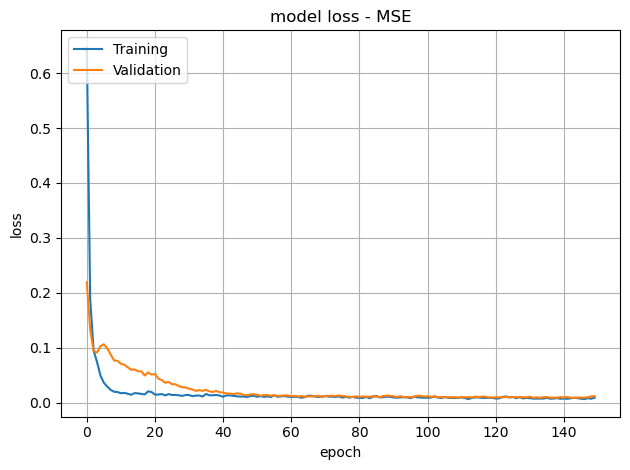

In [85]:

# summarize history for accuracy
# plt.figure()
# plt.grid()
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.tight_layout()
# plt.savefig('autoencoder_learning_curve_accuracy.png', dpi=300)
# plt.show()

# summarize history for loss
plt.figure()
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss - MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('autoencoder_learning_curve_loss.png', dpi=300)
plt.show()

In [86]:
auto_encoder.encoder.save_weights("data/models/encoder_ckpt")